### Classification analysis based on airline customers satisfaction survey
### Author: Hubert Antoniewicz
### Date: 10/2023
### Data source: [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

The aim of the analysis is to predict future airline customers satisfaction based on historical data. Also, key factors that contribute to overall satisfaction will be determined. Due to this, airline will be able to improve those factors in order to make customers use this airline more often.

The dataset contains:
+ 130,000 observations
+ **23 variables which include:**
+ binary target variable ***satisfaction*** {satisfied, not satisfied}
+ 4 quantitative variables (e.g. age, flight distance)
+ 14 ordinal variables (e.g. cleaningness rated from 0 to 5)
+ 1 categorical variable (business/eco/eco plus class)
+ 3 binary variables (type of client, sex, type of travel)

To forecast there will be used 3 different model:
+ decision tree
+ logistic regression
+ random forest 

Models will be trained, tested and then compared. Decision tree and logistic regression models are prefered because of high interpretability of results.


### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### Transforming numeric variables

In [3]:
data[["Age","Flight Distance","Seat comfort","Departure/Arrival time convenient",
      "Food and drink","Gate location","Inflight wifi service","Inflight entertainment",
      "Online support","Ease of Online booking","On-board service","Leg room service",
      "Checkin service","Baggage handling","Cleanliness","Online boarding",
      "Departure Delay in Minutes","Arrival Delay in Minutes"]] = data[[
    "Age","Flight Distance","Seat comfort","Departure/Arrival time convenient","Food and drink",
    "Gate location","Inflight wifi service","Inflight entertainment","Online support",
    "Ease of Online booking","On-board service","Leg room service","Checkin service",
    "Baggage handling","Cleanliness","Online boarding",
    "Departure Delay in Minutes","Arrival Delay in Minutes"]].apply(pd.to_numeric)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Outliers

In [6]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Frequency analysis for categorical variables

Only Arrival Delay in Minutes variable contains outliers but in theory it means no delay or unknown for customers (which doesn't affect his overall satisfaction). It means we don't need to handle this outlier.

In [7]:
category = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for c in category:
    print ("{} \n".format(data[c].value_counts()))
data['satisfaction']=data['satisfaction'].map({'satisfied':1,'dissatisfied':0})

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64 

Gender
Female    65899
Male      63981
Name: count, dtype: int64 

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64 

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64 

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64 



**Target variable is well balanced.**

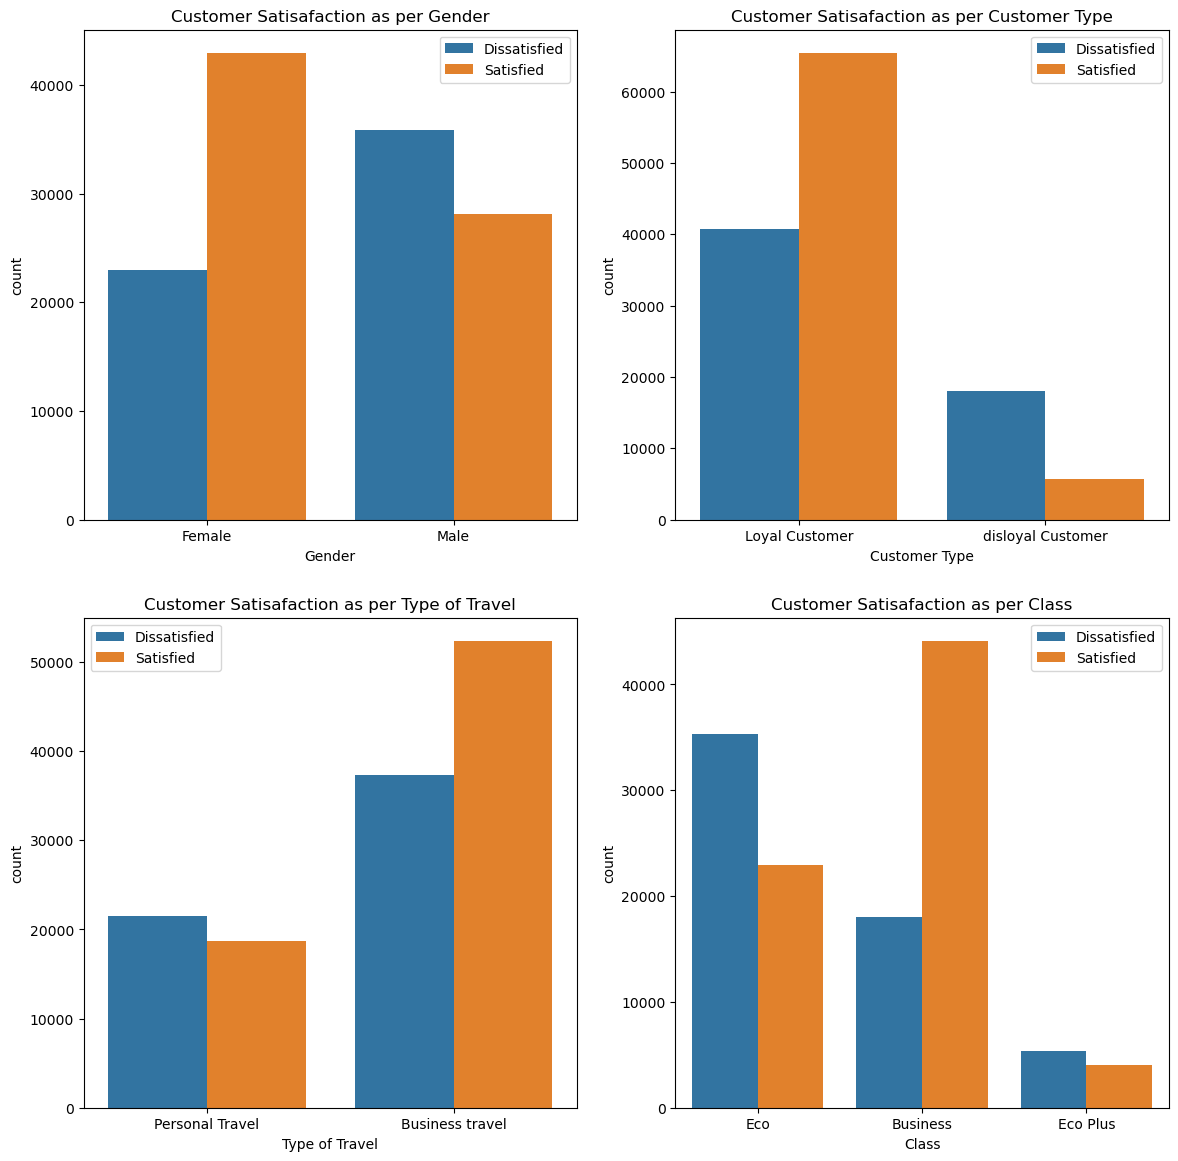

In [8]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=data,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    c+=1

**As presented above, categorical variables well diversify target variable so they can potentially be great predictors.**

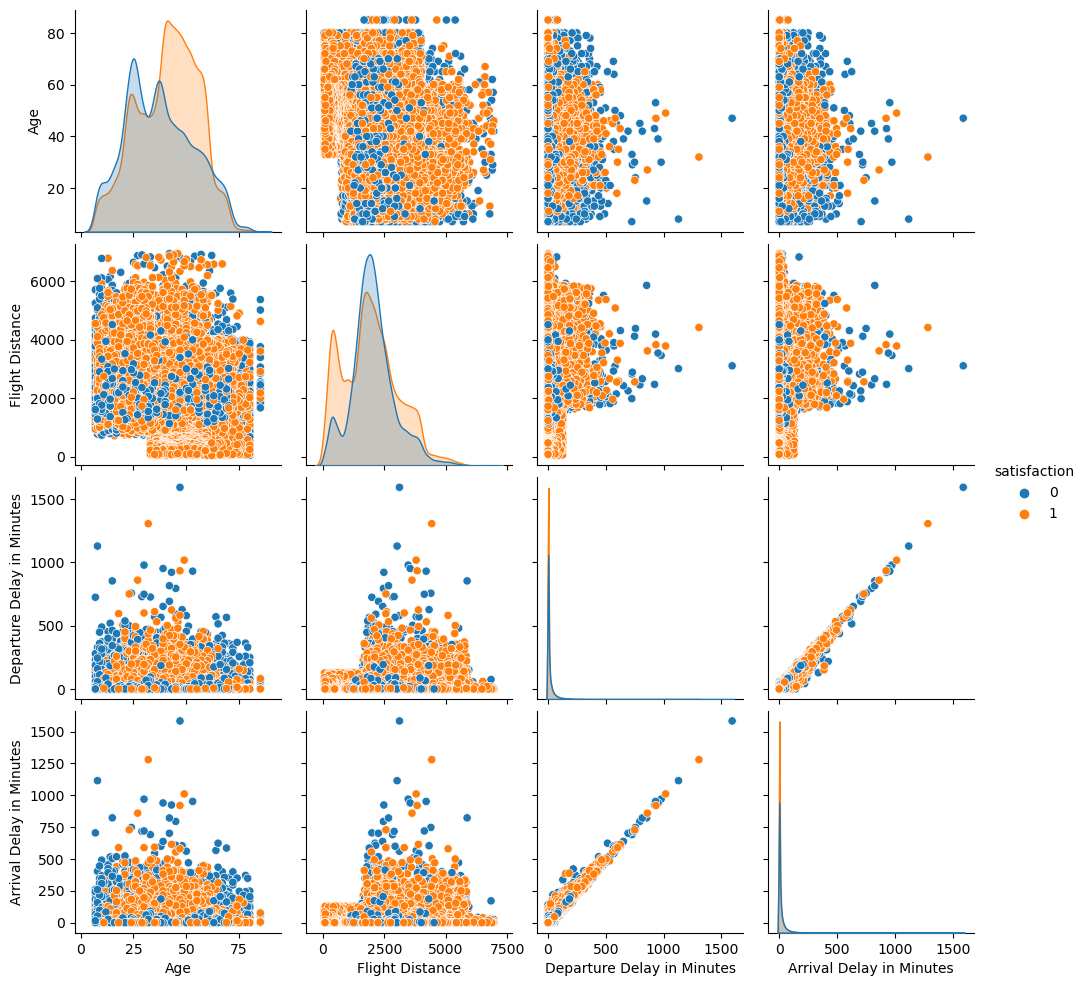

In [9]:
sns.pairplot( data=data, vars=("Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"), hue="satisfaction" )


### Data preprocessing:

In [10]:
def preprocess_inputs(df):
    df = df.copy()
    
 
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
    
    df['Gender'] = df['Gender'].replace({
        'Female': 0,
        'Male': 1
    })
    df['Customer Type'] = df['Customer Type'].replace({
        'disloyal Customer': 0,
        'Loyal Customer': 1
    })
    df['Type of Travel'] = df['Type of Travel'].replace({
        'Personal Travel': 0,
        'Business travel': 1
    })
 
    flight_class_dummies = pd.get_dummies(df['Class'], prefix='Flight_class')
    df = pd.concat([df, flight_class_dummies], axis=1)
    df = df.drop('Class', axis=1)
    
    return df
  
X = preprocess_inputs(data)
 
X.tail(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_class_Business,Flight_class_Eco,Flight_class_Eco Plus
129875,1,0,0,29,0,1731,5,5,5,3,...,3,4,4,4,2,0,0.0,False,True,False
129876,0,1,0,63,0,2087,2,3,2,4,...,3,3,1,2,1,174,172.0,True,False,False
129877,0,1,0,69,0,2320,3,0,3,3,...,3,4,2,3,2,155,163.0,False,True,False
129878,0,1,0,66,0,2450,3,2,3,2,...,2,3,2,1,2,193,205.0,False,True,False
129879,0,0,0,38,0,4307,3,4,3,3,...,5,5,3,3,3,185,186.0,False,True,False


### Outlier analysis:

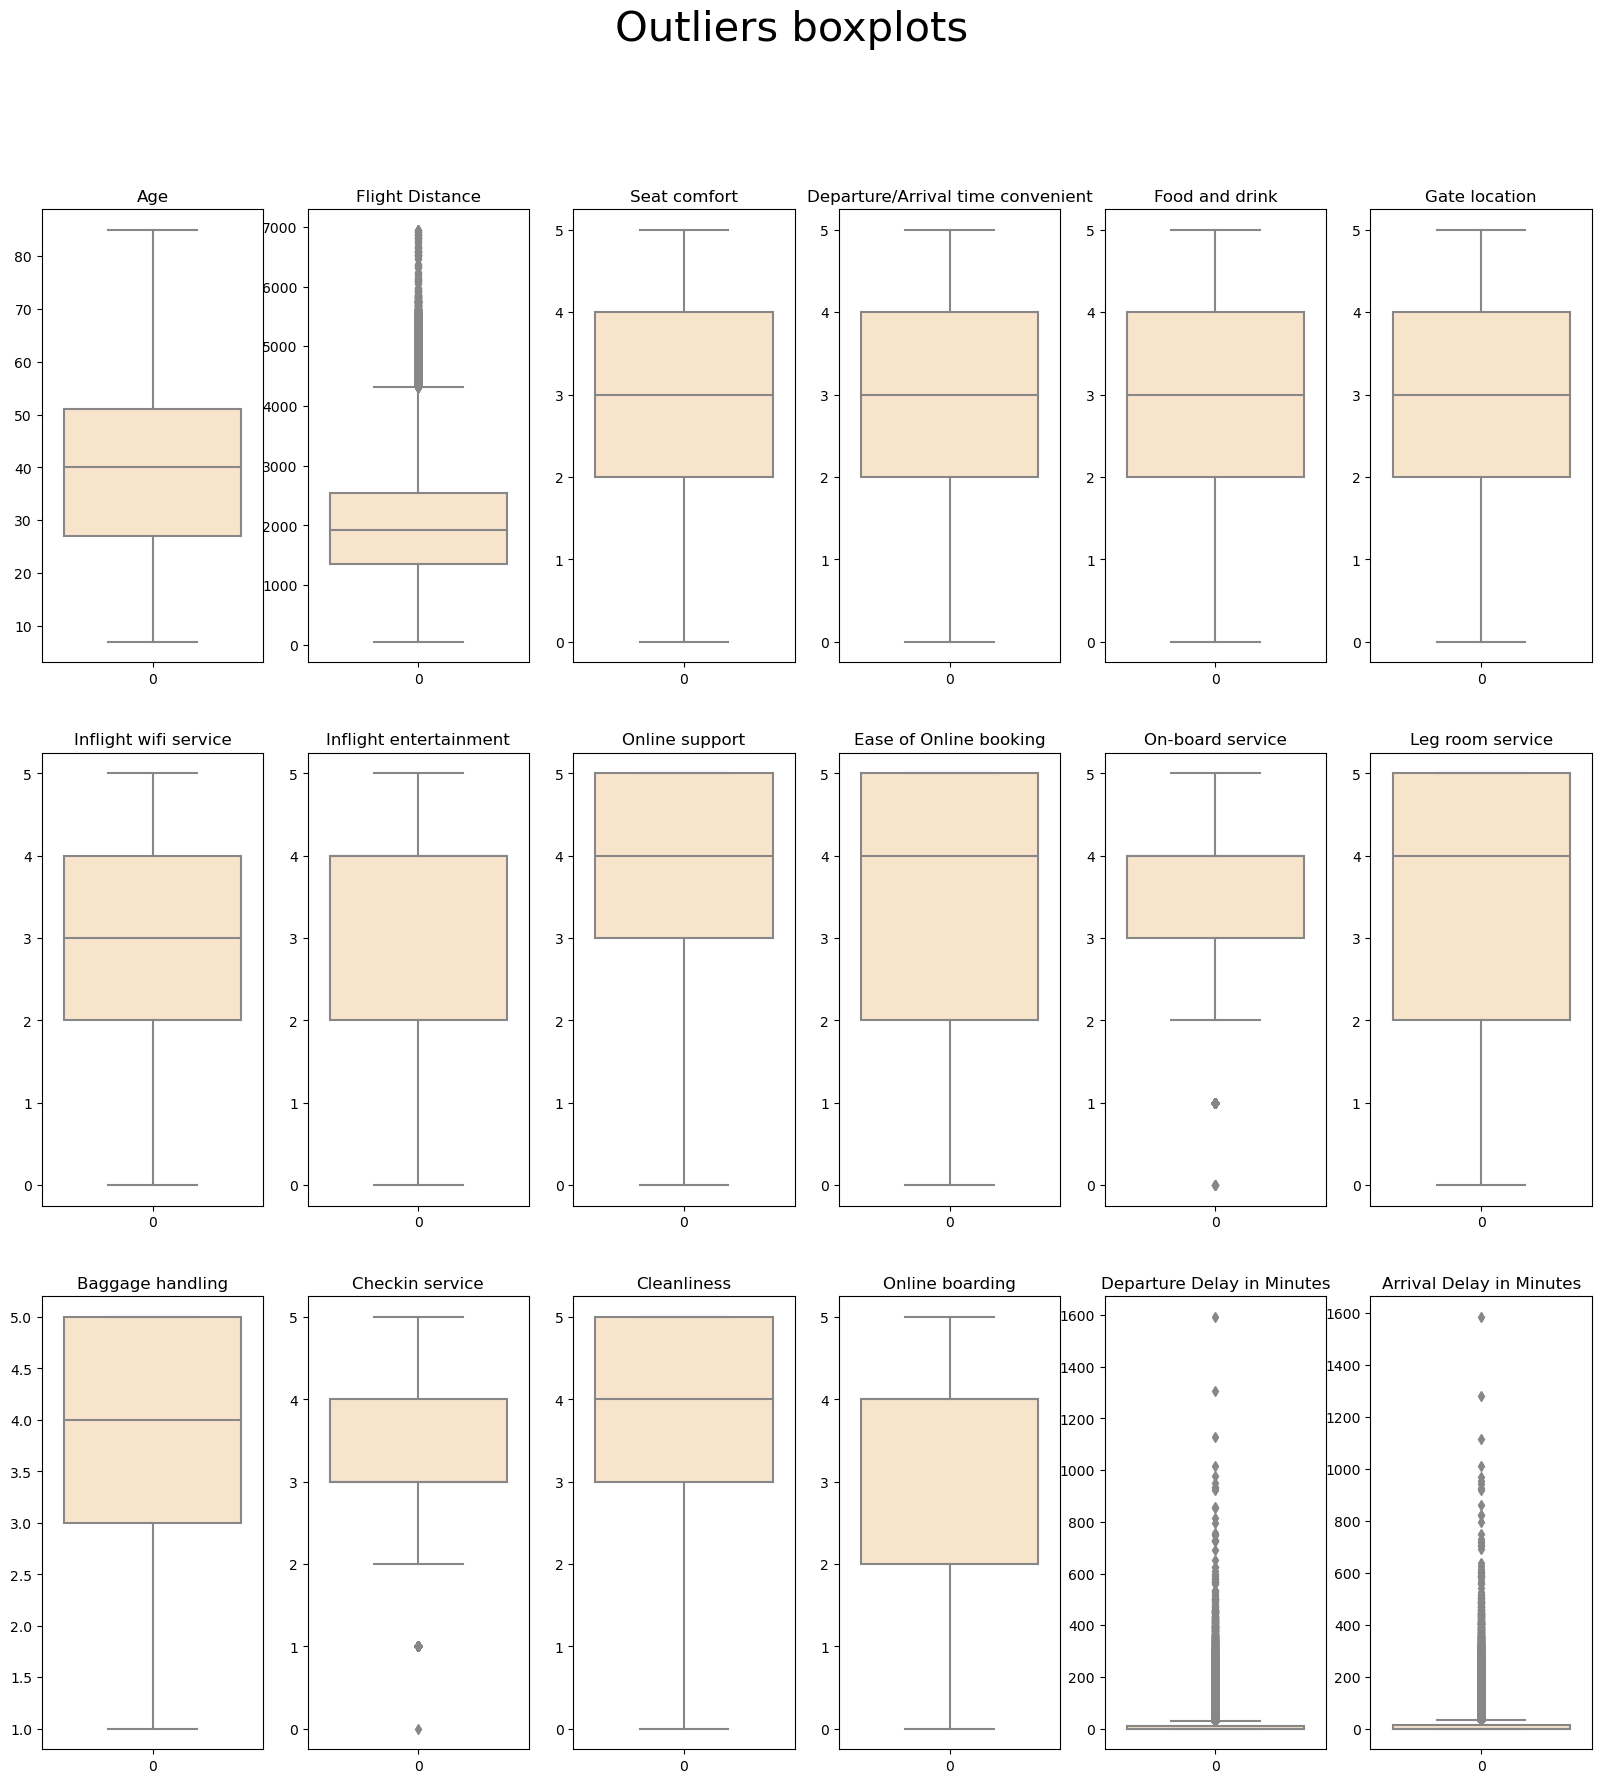

In [11]:
data_df = X.drop('satisfaction', axis=1).copy()
nonbinary_columns = [column for column in data_df.columns if len(data_df[column].unique()) > 2]
 
plt.figure(figsize=(20, 20))
 
for i, column in enumerate(nonbinary_columns):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(data=data_df[column], color='bisque')
    plt.title(column)
 
plt.suptitle("Outliers boxplots", size=30)
plt.show()

In [12]:
def finalize_inputs(df, keep_outliers=True, outlier_threshold=0.05):
    df = df.copy()
    
    train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)
    
    if keep_outliers == False:
        train_df = remove_outliers(
            train_df,
            columns=[
                'On-board service',
                'Checkin service',
                'Departure Delay in Minutes',
                'Arrival Delay in Minutes'
            ],
            threshold=outlier_threshold
        )
    
    y_train = train_df['satisfaction']
    y_test = test_df['satisfaction']
    X_train = train_df.drop('satisfaction', axis=1)
    X_test = test_df.drop('satisfaction', axis=1)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = finalize_inputs(X, keep_outliers=True)

### Decision tree

In [14]:
for d in range(8,15):
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=100)
  dtc.fit(X_train,y_train)
  pred_dtc=dtc.predict(X_test)
  print("d=",d)
  print(round(accuracy_score(y_test,pred_dtc),3))
  
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=12,max_leaf_nodes=100)
dtc_best.fit(X_test,y_test)
 
pred_best=dtc_best.predict(X_test)
pred_best_t =dtc_best.predict(X_train)
 
print("Forecast accuracy for best decision tree model equals: ")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test,pred_best) * 100))
print("Train Accuracy: {:.2f}%".format(accuracy_score(y_train,pred_best_t) * 100))

d= 8
0.913
d= 9
0.916
d= 10
0.921
d= 11
0.923
d= 12
0.924
d= 13
0.924
d= 14
0.924
Forecast accuracy for best decision tree model equals: 
Test Accuracy: 93.08%
Train Accuracy: 92.65%


### Logistic regression

In [15]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
 
print("Forecast accuracy for best logistic regression model equals: ")
print("Test Accuracy: {:.2f}%".format(model2.score(X_test, y_test) * 100))
print("Train Accuracy: {:.2f}%".format(model2.score(X_train, y_train) * 100))
 
pred_log1=model2.predict(X_test)
print('Confusion Matrix to\n',confusion_matrix(y_test,pred_log1))

Forecast accuracy for best logistic regression model equals: 
Test Accuracy: 83.62%
Train Accuracy: 83.53%
Confusion Matrix to
 [[14453  3247]
 [ 3136 18128]]


In [16]:
preds = model2.predict(X_test)
params = model2.get_params()
params
 
logit_model=sm.Logit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats=result.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.386167
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                90916
Model:                          Logit   Df Residuals:                    90891
Method:                           MLE   Df Model:                           24
Date:                Wed, 25 Oct 2023   Pseudo R-squ.:                  0.4391
Time:                        23:46:46   Log-Likelihood:                -35109.
converged:                       True   LL-Null:                       -62598.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.3571      0.010     35

In [17]:
np.exp(model2.coef_)

array([[0.61485068, 2.14997627, 0.88741836, 1.45059425, 0.88703397,
        1.49484374, 0.74896958, 0.72449536, 1.15810808, 0.90911462,
        2.50895191, 1.12873242, 1.34925463, 1.47527014, 1.33299213,
        1.13076053, 1.45569276, 1.09883871, 1.24035792, 1.09903842,
        0.74161359, 1.22372647, 0.86166654, 0.90159626]])

### Random forest 

In [18]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=30,max_leaf_nodes=4100)
 
rfc.fit(X_train, y_train)
 
pred_rfc = rfc.predict(X_test)
rfc_train= rfc.predict(X_train)
 
print("Forecast accuracy for best random forest model equals: ")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test,pred_rfc) * 100))
print("Train Accuracy: {:.2f}%".format(accuracy_score(y_train,rfc_train) * 100))

Forecast accuracy for best random forest model equals: 
Test Accuracy: 95.63%
Train Accuracy: 99.51%


### Comparison

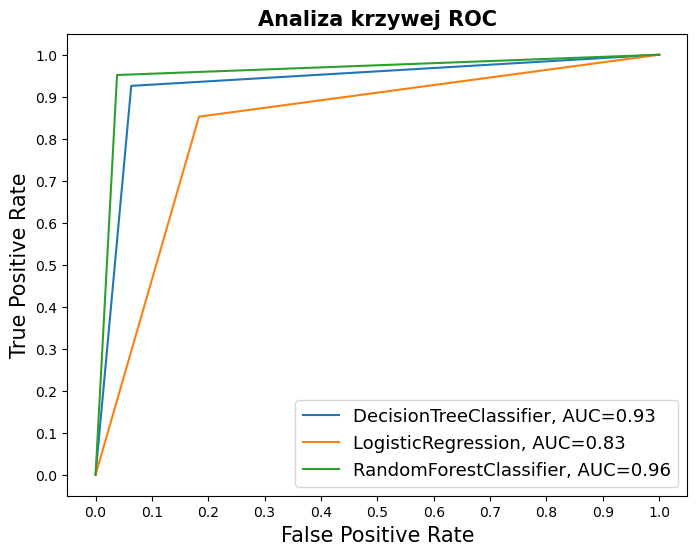

In [19]:
classifiers = [DecisionTreeClassifier(random_state=1234),
               LogisticRegression(random_state=1234), 
               RandomForestClassifier(random_state=1234)]
 
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
 
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, pred_best)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, pred_log1)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, pred_rfc)
auc1 = roc_auc_score(y_test, pred_best)
auc2 = roc_auc_score(y_test, pred_log1)
auc3 = roc_auc_score(y_test, pred_rfc)


result_table = result_table._append({'classifiers':DecisionTreeClassifier.__class__.__name__,
                                     'fpr':lr_fpr1, 
                                     'tpr':lr_tpr1, 
                                     'auc':auc1}, ignore_index=True)
 
result_table = result_table._append({'classifiers':LogisticRegression.__class__.__name__,
                                     'fpr':lr_fpr2, 
                                     'tpr':lr_tpr2, 
                                     'auc':auc2}, ignore_index=True)
 
result_table = result_table._append({'classifiers':RandomForestClassifier.__class__.__name__,
                                     'fpr':lr_fpr3, 
                                     'tpr':lr_tpr3, 
                                     'auc':auc3}, ignore_index=True)
 
 
fig = plt.figure(figsize=(8,6))
 
 
plt.plot(result_table.loc[0]['fpr'], 
         result_table.loc[0]['tpr'], 
         label="DecisionTreeClassifier, AUC={:.2f}".format( result_table.loc[0]['auc']))
 
plt.plot(result_table.loc[1]['fpr'], 
         result_table.loc[1]['tpr'], 
         label="LogisticRegression, AUC={:.2f}".format( result_table.loc[1]['auc']))
 
plt.plot(result_table.loc[2]['fpr'], 
         result_table.loc[2]['tpr'], 
         label="RandomForestClassifier, AUC={:.2f}".format( result_table.loc[2]['auc']))
 
 
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
 
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
 
plt.title('Analiza krzywej ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
 
plt.show()

### Results interpretation
Based on the results of the analysis and odds ratio calculated from the logistic regression coefficients, we can conclude that:
+ Customers who positively rated inflight entertainment are 2.5 more likely to positively evaluate the overall flight experience

+ Economy and Economy Plus passengers are more likely to complain.

+ Passengers who found the seat comfortable, are more likely by 40% to be satisfied from the trip

+ Older customers are more often not satisfied with the flight. This odd is higher in average by 11% with every year.

Passengers expect during flight more entertainemt and comfortable seating. Those are the main factors that airline should improve in order to make customers come back and be more satisfied from their services. Even though logistic regression results are the worst, we can use regression coefficient to indicate most meaningful variables. This is the only factor that can mathematically show impact of every explanatory variable.

Best forecast results on test data, based on area under ROC curve was received by random forest model. This model should be used for the prediction purposes. Unfortunately, this model belong to "black box" models which means that the results can't be interpretated. If we would like to understand the decision rules, we could use decision tree which also gave great results (AUC = 0.93).
